In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os
import re
import cv2
import time

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
results_dir = '/u/jskang/project/tracking/darknet/parse/parsed'
data_dir = '/u/jskang/project/tracking/orig_data'

In [11]:
def scale_box(df, im):
    predict_im_size = 832.
    df.columns = ['prob', 'x', 'y', 'w', 'h']

    # Vertical is stretched as the same as width, rest is filled with blank space
    im_height, im_width, _ = im.shape
    width_scale = im_width / predict_im_size
    height_scale = im_height / predict_im_size
    scale_diff = (predict_im_size - (im_height / width_scale)) / 2.
    
    df.iloc[:,[1,3]] = np.round(df.iloc[:,[1,3]] * width_scale)
    df.iloc[:,[2,4]] = np.round((df.iloc[:,[2,4]] - scale_diff) * width_scale)
    df.iloc[:,3] = df.iloc[:,3] - df.iloc[:,1]
    df.iloc[:,4] = df.iloc[:,4] - df.iloc[:,2]
    
    return df

def ltbr_2_xywh(df):
    df = df.copy(deep=True)
    df.columns = ['prob', 'x', 'y', 'w', 'h']
    df.iloc[:,3] = df.iloc[:,3] - df.iloc[:,1]
    df.iloc[:,4] = df.iloc[:,4] - df.iloc[:,2]
    
    return df
def show_image(im):
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.] )
    ax.set_axis_off( )
    fig.add_axes(ax)
    
    ax.imshow(im)
    return ax

0
prob      0.52635
x        79.00000
y       118.00000
w        21.00000
h        73.00000
Name: 1, dtype: float64
tracking
(79.0, 118.0, 21.0, 73.0)
1
(71.0, 128.0, 21.0, 73.0)
2
(62.0, 98.0, 21.0, 73.0)
3
(58.0, 119.0, 21.0, 73.0)
4
(49.0, 121.0, 21.0, 73.0)
5
(41.0, 121.0, 21.0, 73.0)
6
(48.0, 118.0, 21.0, 73.0)
7
(48.0, 109.0, 21.0, 73.0)
8
(39.0, 79.0, 21.0, 73.0)
9
(40.0, 86.0, 21.0, 73.0)
10
(36.0, 96.0, 21.0, 73.0)
11
(40.0, 102.0, 21.0, 73.0)
12
(38.0, 97.0, 21.0, 73.0)
13
(36.0, 76.0, 21.0, 73.0)
14
(33.0, 92.0, 21.0, 73.0)
15
(40.0, 94.0, 21.0, 73.0)
16
(39.0, 101.0, 21.0, 73.0)
17
(35.0, 118.0, 21.0, 73.0)
18
(34.0, 132.0, 21.0, 73.0)
19
(37.0, 126.0, 21.0, 73.0)


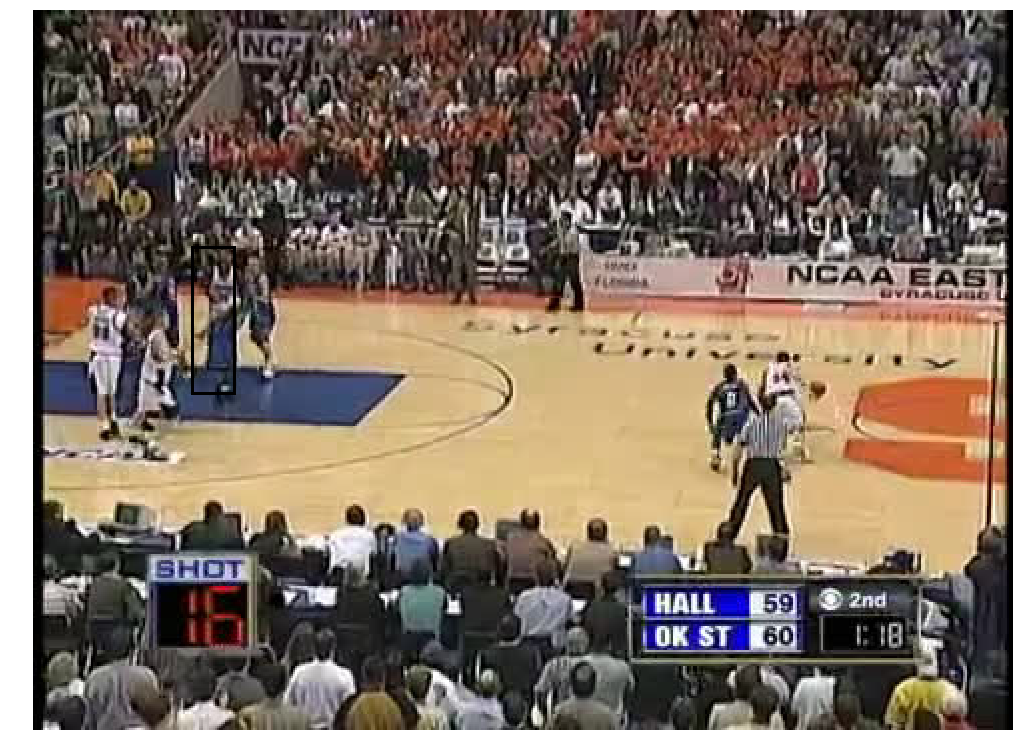

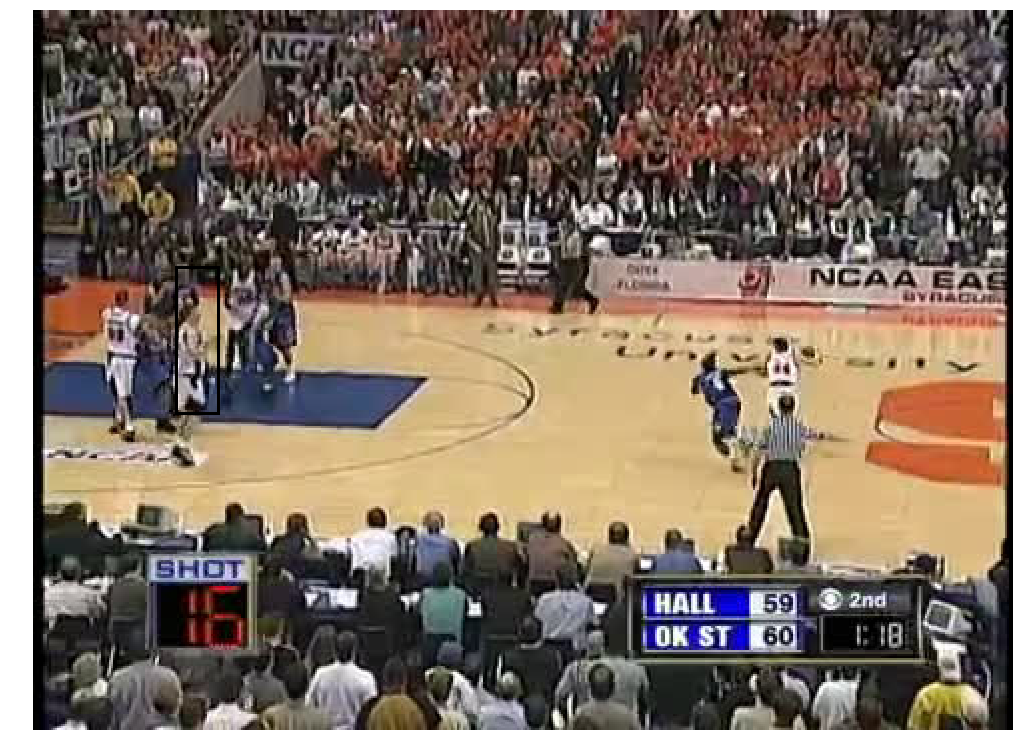

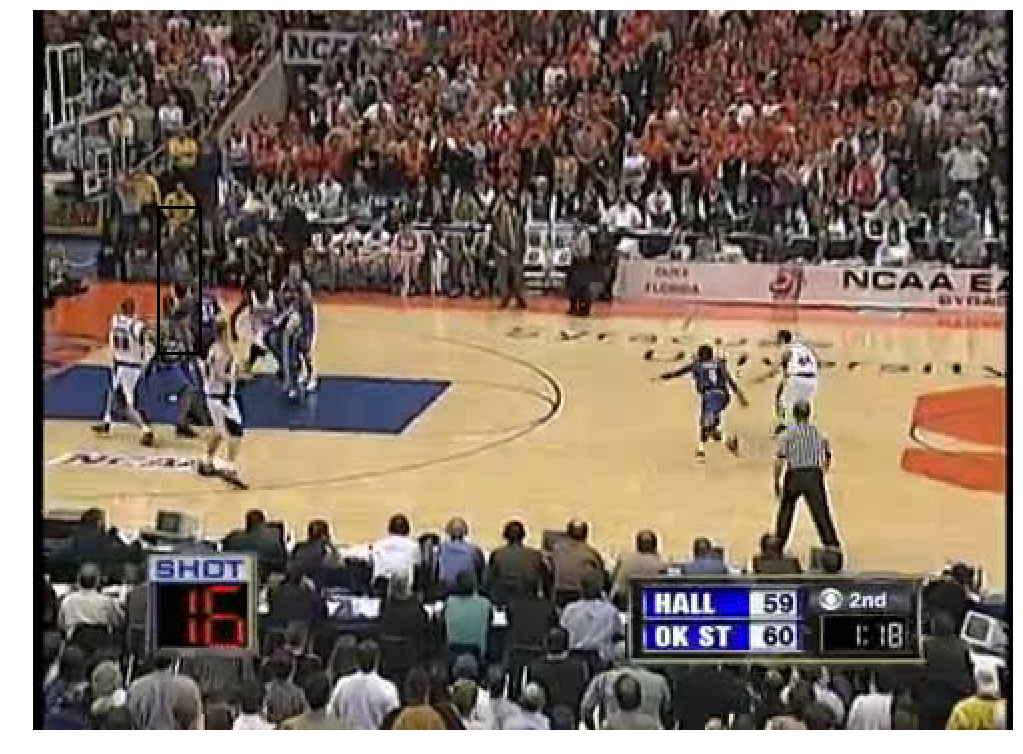

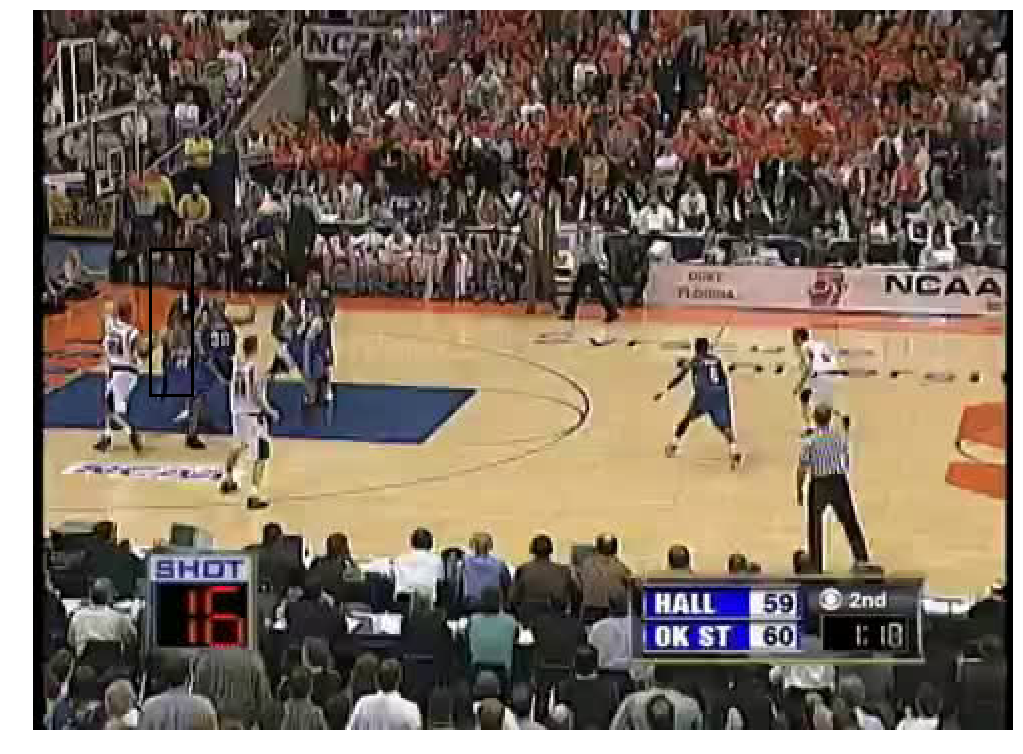

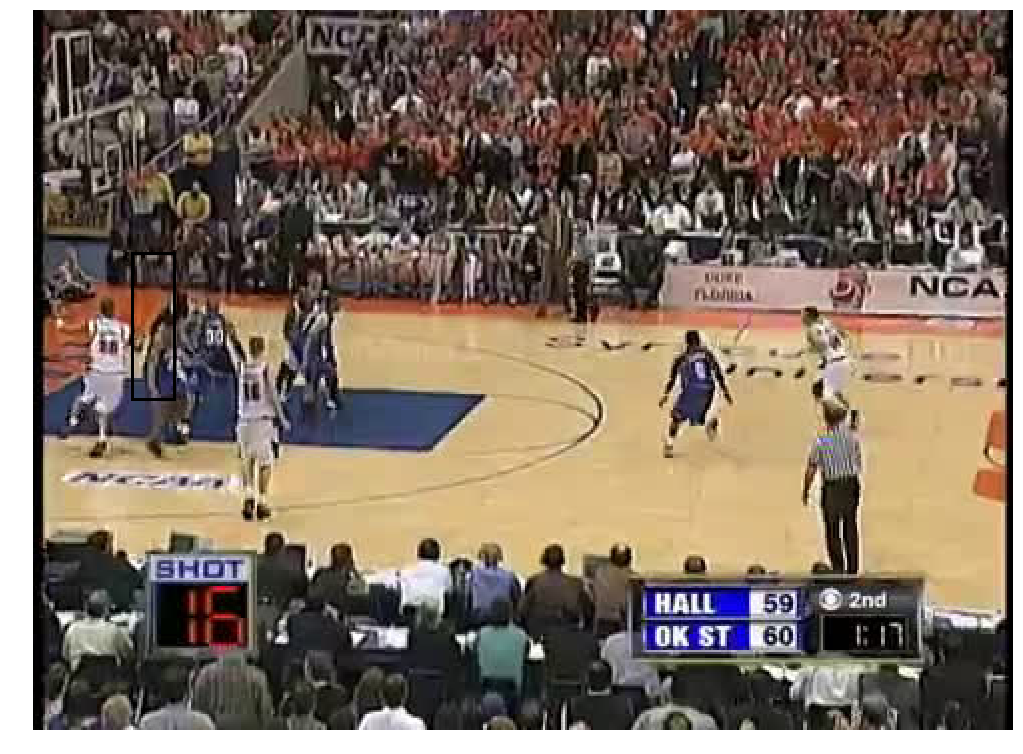

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


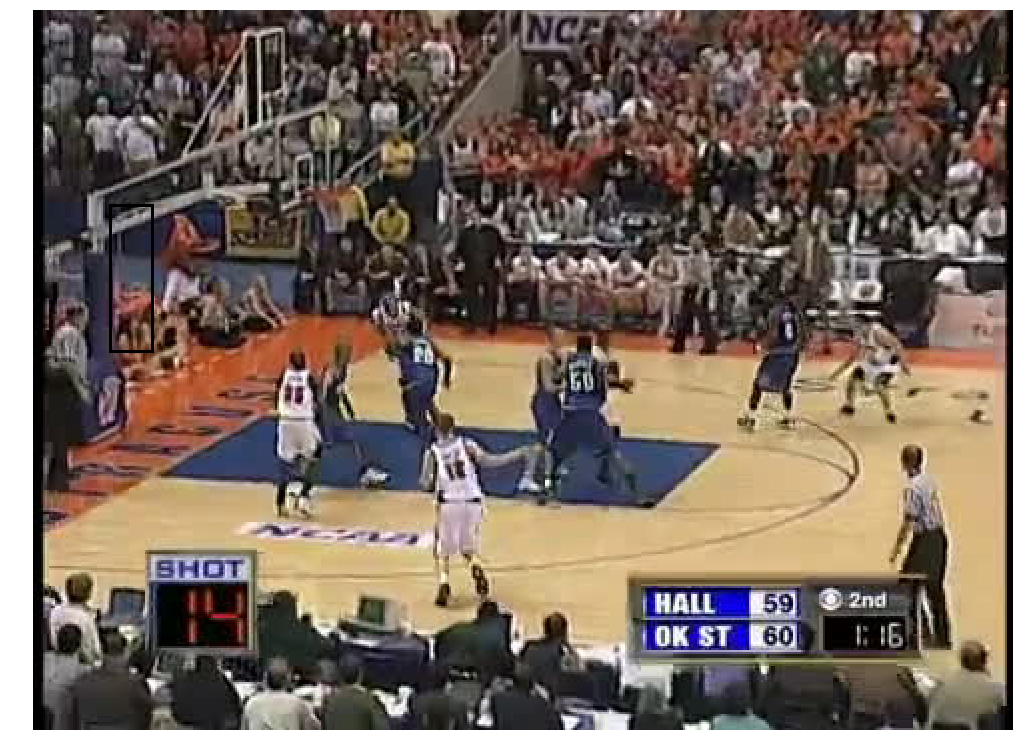

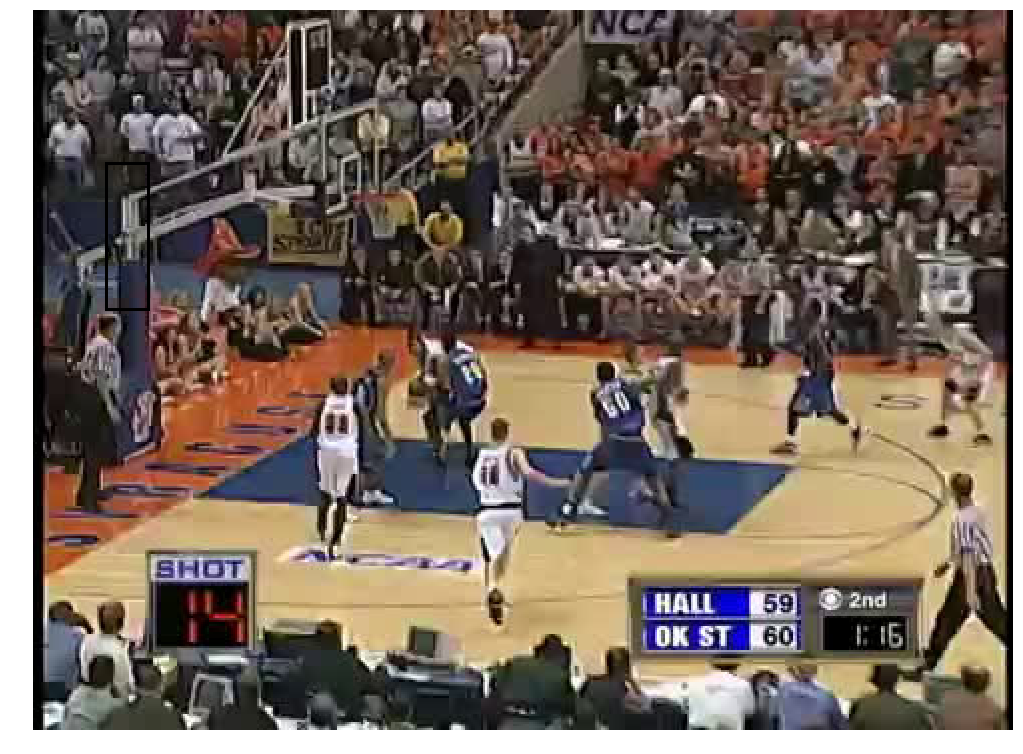

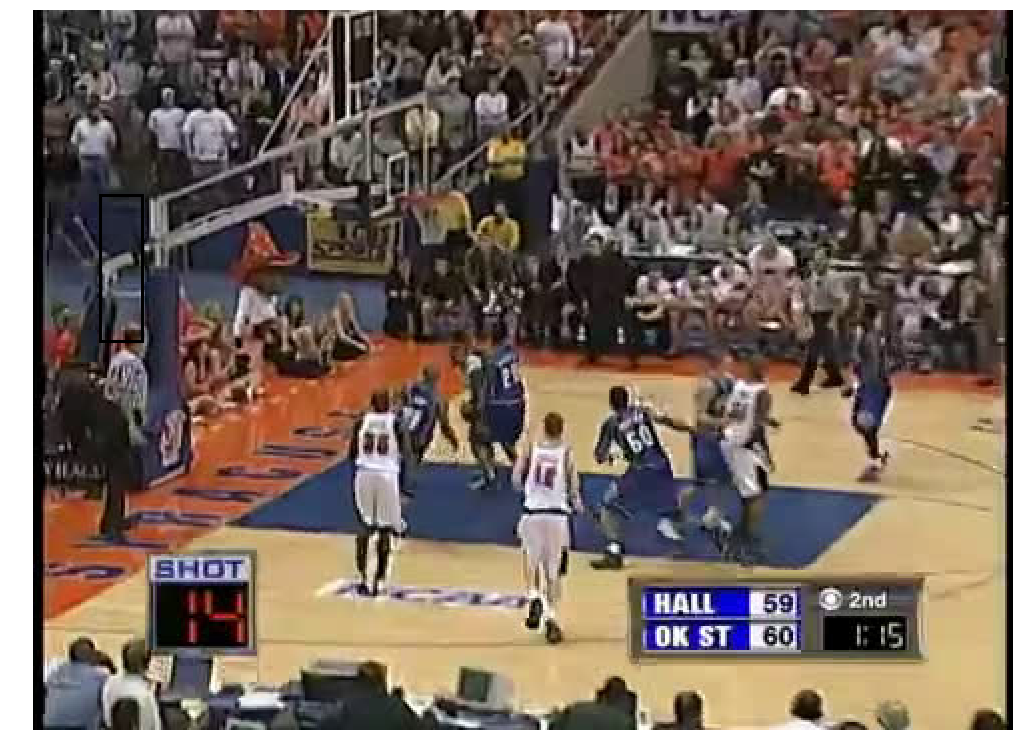

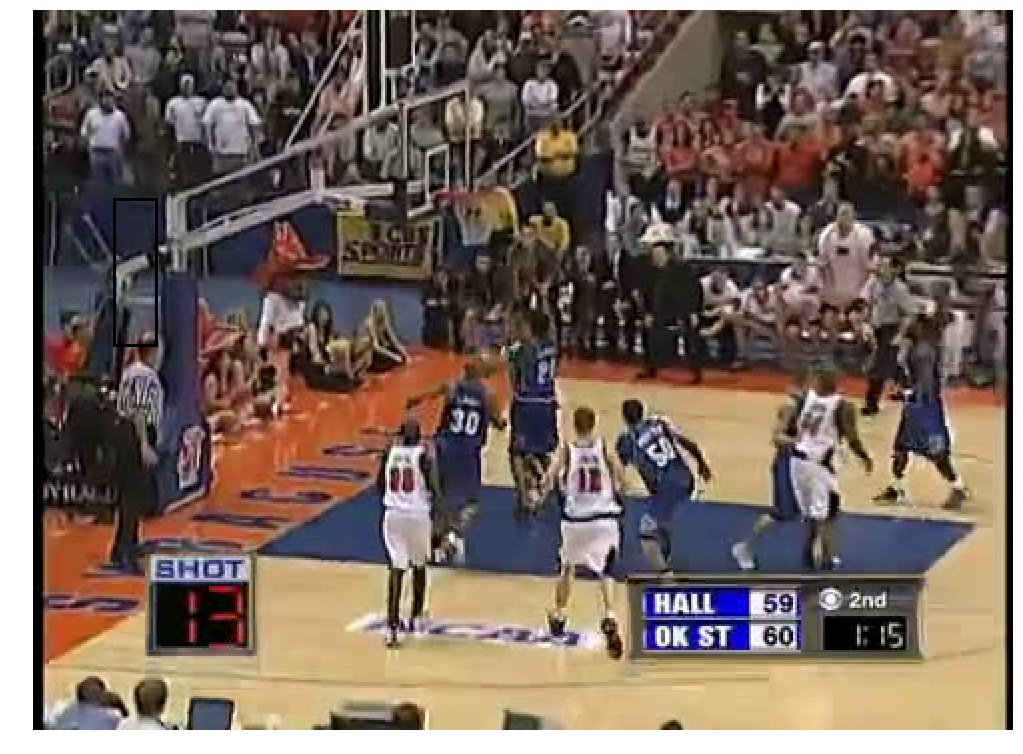

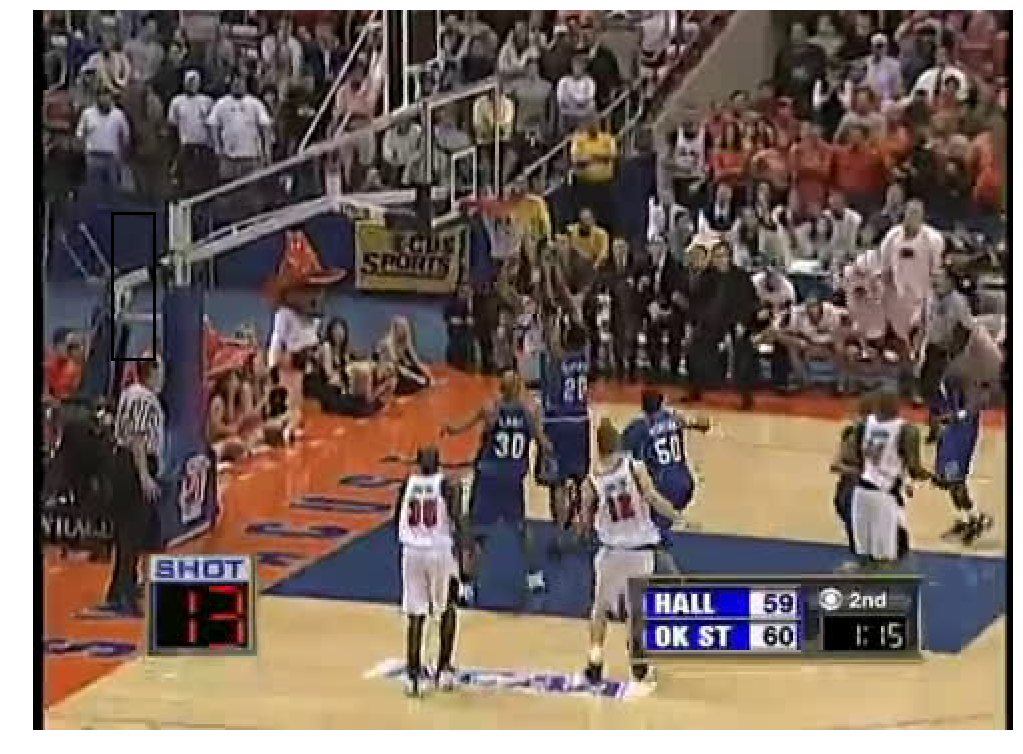

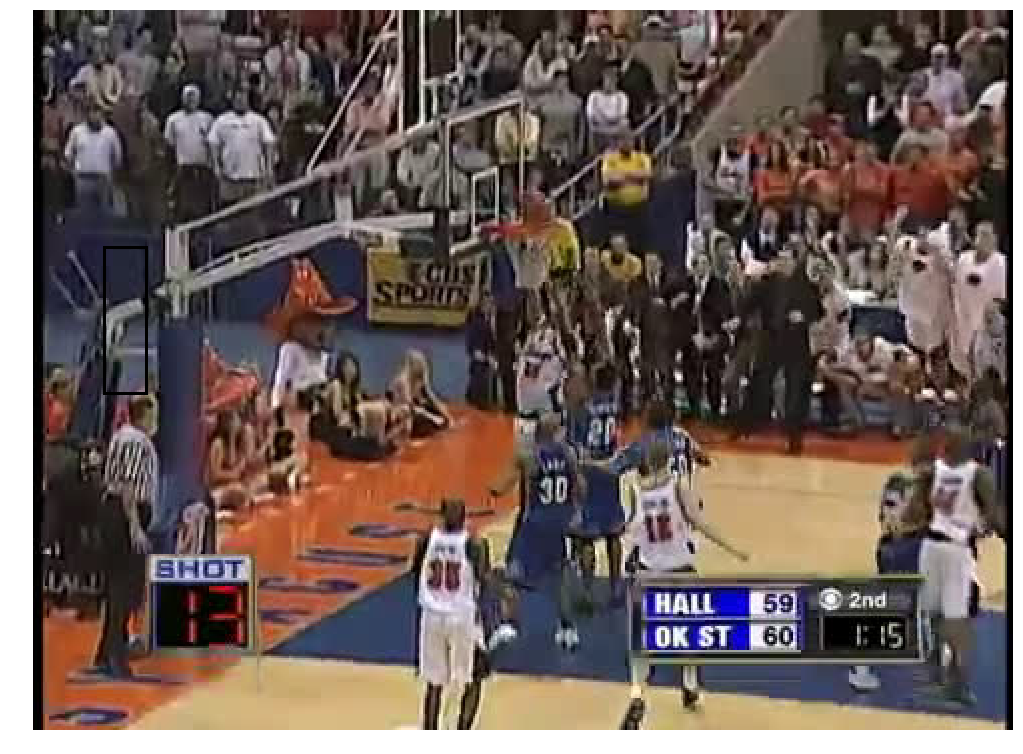

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [27]:
# Set up tracker.
# Instead of MIL, you can also use
# BOOSTING, KCF, TLD, MEDIANFLOW or GOTURN
video_id = 'WF0GqBJuBLQ'
clip_id  = 'clip_65'
image_dir = os.path.join(data_dir, video_id, clip_id)
images = [name for name in os.listdir(image_dir) if 'png' in name]
images.sort()

tracker = cv2.Tracker_create("BOOSTING")

for i in range(len(images)):
    image = images[i]
    image_path = os.path.join(image_dir, image)

    frame = cv2.imread(image_path)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    print i
    if i == 0:
        frame_number = image.split('.')[0]
        csv_name = video_id + '_' + clip_id + '_' + frame_number + '.txt'
        csv_path = os.path.join(results_dir, csv_name)
        csv_file = pd.read_csv(csv_path, header = None)
        fixed = scale_box(csv_file, frame)
        fixed = fixed.iloc[1,:]
        print fixed
        bbox = (fixed.x, fixed.y, fixed.w, fixed.h)
        print 'tracking'
        ok = tracker.init(frame, bbox)
    else:
        ok, bbox = tracker.update(frame)
    print bbox
    ax = show_image(frame)
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth = 3, fill = False)
    ax.add_patch(rect)
    

In [ ]:
video_id = 'WF0GqBJuBLQ'
clip_id  = 'clip_65'
image_dir = os.path.join(data_dir, video_id, clip_id)
images = [name for name in os.listdir(image_dir) if 'png' in name]
images.sort()

tracker = cv2.Tracker_create("BOOSTING")

for i in range(len(images)):
    image = images[i]
    image_path = os.path.join(image_dir, image)